# Develop a predicting model to calculate disease progression in diabetes based on their baseline characteristics.

In [9]:
# We have to import all the necessary imports

import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import plotly.express as px
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import datasets
from sklearn.metrics import mean_squared_error

In [10]:
# Load the diabetes data

loadData = datasets.load_diabetes()



In [11]:
# Converting into DataFrame
dataframe = pd.DataFrame(data=loadData.data, columns=loadData.feature_names)

# Add the target variable
dataframe['Disease Progression'] = loadData.target

dataframe

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Disease Progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


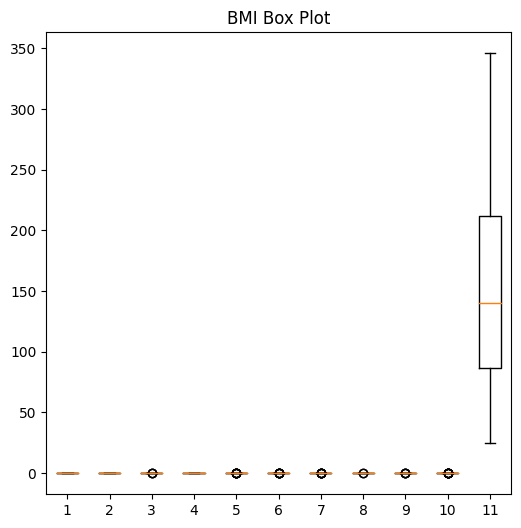

In [12]:
fig = plt.figure(figsize =(6,6))
 
# Creating plot
plt.boxplot(dataframe)

#Plot title
plt.title('BMI Box Plot')

# show plot
plt.show()

### Scatter Ploting using seaborn

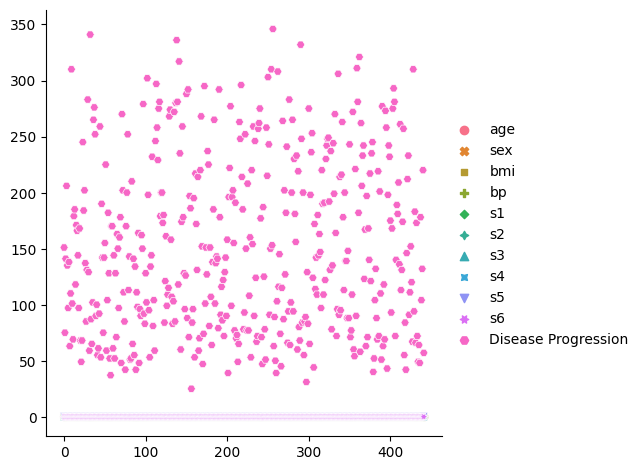

In [13]:

sns.relplot(dataframe)


### Heatmap plotting using seaborn 

<Axes: >

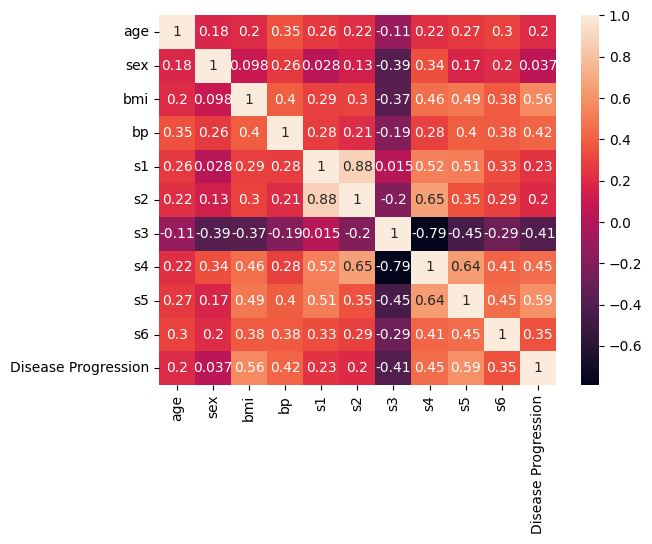

In [14]:
sns.heatmap(dataframe.corr(method="spearman"), annot=True)


## Creating a linear regression Model

In [15]:
# Extract the bmi feature  - 3rd feature
bodymassindex = loadData.data[:,2]  

# Reshaping the bmi feature to 2d array
bodymassindex = bodymassindex.reshape(-1,1)

X = bodymassindex
y = loadData.target


In [16]:
# Split the data in to ratio 80:20.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


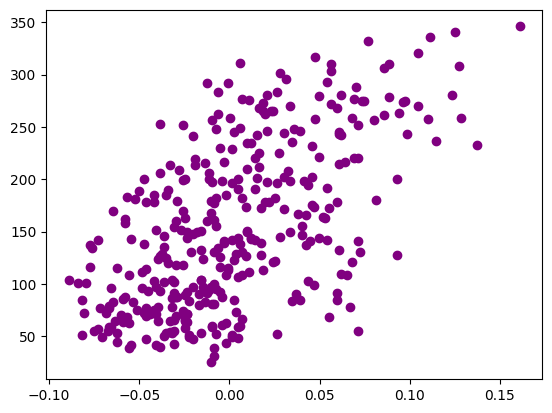

In [23]:
# Train Data
plt.scatter(X_train, y_train, color="purple")

In [17]:
# Creat a model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

LinearRegression()

#### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [18]:
# Prediction making
y_Pred = model.predict(X_test)


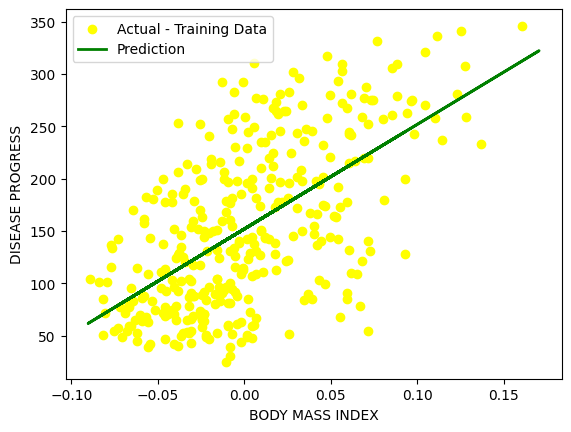

Coefficient: [998.57768914]
Intercept:  152.00335421448167
The loss, mean squared error: 4061.83


In [19]:
# Plot the scatter plot and linear regression line
plt.scatter(X_train, y_train, color='Yellow', label='Actual - Training Data')
plt.plot(X_test, y_Pred, color='green', linewidth=2, label='Prediction')
plt.xlabel('BODY MASS INDEX')
plt.ylabel('DISEASE PROGRESS')
plt.legend()
plt.show()
#Coefficient
print("Coefficient:", model.coef_)
# Intercept
print('Intercept: ', model.intercept_)
# Mean squared error
print("The loss, mean squared error: %.2f" % mean_squared_error(y_test, y_Pred))

## Loss in training functions

In [20]:
y_pred_train = model.predict(X_train)
print("The loss in training data: %.2f" % mean_squared_error(y_train, y_pred_train))

The loss in training data: 3854.11
